### Imports

In [ ]:
import pandas as pd
import os

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Scorpions

## Data

In [ ]:
# scorpion_obs_path = "/content/drive/MyDrive/University/Year 4/Semester H/The Art of Analyzing Big Data/Project/נתוני עקרבים/obs.csv"
scorpion_obs_path = "/content/drive/MyDrive/obs.csv"
scorpion_obs = pd.read_csv(scorpion_obs_path)
columns_to_remove = ['Othe Animal חיה אחרת', 'Uncommon Species מינים נדירים', 'Age הערכת גיל.1', 'General Comment הערה כללית', ' לחץ על ה + להוספת תצפית בנקודה זו ', 'Creator', 'EditDate', 'Editor', 'ObjectID','x','y','GlobalID']
scorpion_obs.drop(columns=columns_to_remove, inplace=True)
column_name_mapping = {
    'Common Species name מינים נפוצים': 'Species_name',
    'Age הערכת גיל': 'Age',
}
scorpion_obs.rename(columns=column_name_mapping, inplace=True)

scorpion_obs.head(3)

,Species_name,Age,ParentGlobalID,CreationDate
0,Orthochirus scrobiculosus,Mature,387aed50-59ba-4d36-a6ca-6390d470984e,3/17/2021 9:20:06 AM
1,Orthochirus scrobiculosus,Juvenile,387aed50-59ba-4d36-a6ca-6390d470984e,3/17/2021 9:20:06 AM
2,Unknown,Unknown,387aed50-59ba-4d36-a6ca-6390d470984e,3/17/2021 9:20:06 AM


In [ ]:
scorpion_obs.isna().sum()

Species_name      23
Age               51
ParentGlobalID     0
CreationDate       0
dtype: int64

In [ ]:
# scorpion_plot_path = "/content/drive/MyDrive/University/Year 4/Semester H/The Art of Analyzing Big Data/Project/נתוני עקרבים/plot.csv"
scorpion_plot_path = "/content/drive/MyDrive/plot.csv"

scorpion_plot = pd.read_csv(scorpion_plot_path)

column_name_mapping = {
    'Moon status מצב ירח': 'Moon_status',
    'Ground Temperature טמפרטורת קרקע': 'Ground_Temperature',
    'Plot direction מיקום חלקה':'Plot_direction',
    'Plot distance מיקום חלקה':'Plot_distance',
    'Habitat תיאור בית הגידול':'Habitat',
    'Total observers מספר צופים כללי':'Total_observers'
}
scorpion_plot.rename(columns=column_name_mapping, inplace=True)

def section(row):
  if row.Plot_direction == 'East': return 'East'
  elif row.Plot_direction == 'West' and row.Plot_distance=='Near': return 'Center'
  elif row.Plot_direction == 'West' and row.Plot_distance == 'Far': return 'West'
  else: print(row.Plot_direction, row.Plot_distance)

scorpion_plot['Section'] = scorpion_plot.apply(section,axis=1)

columns_to_remove = ['Date','ObjectID', 'startauto', 'endauto', 'Observer שם צופה ראשי', 'Observer שם צופה ראשי.1', 'Creator', 'EditDate', 'Editor','Observation Type סוג התצפית','Section Start Time זמן התחלת קטע תצפית', 'No Observations במידה שלא נצפו עקרבים סמן "לא"',
                     'Section End time שעת סיום הקטע','Plot_direction','Plot_distance','CreationDate']
scorpion_plot.drop(columns=columns_to_remove, inplace=True)

scorpion_plot.head(3)

nan nan


,GlobalID,Total_observers,Moon_status,Ground_Temperature,Habitat,x,y,Section
0,387aed50-59ba-4d36-a6ca-6390d470984e,2,Almost empty,NaN,Main,35.130741,30.144741,Center
1,9885c4ad-24b9-4f56-be28-3c19fd3ea1ef,2,Almost full,17.0,Secondary,35.145659,30.140667,East
2,8dbef592-47d3-4114-8f74-31dcc4feff1a,2,Almost full,16.0,Open,35.145225,30.140923,East


In [ ]:
scorpion_plot.isna().sum()

GlobalID              0
Total_observers       0
Moon_status           0
Ground_Temperature    6
Habitat               1
x                     0
y                     0
Section               1
dtype: int64

In [ ]:
scorpion = pd.merge(scorpion_obs, scorpion_plot, left_on='ParentGlobalID', right_on='GlobalID')

In [ ]:
def get_season(date):
  season_mapping = {
                    1: 'Winter',
                    2: 'Winter',
                    3: 'Spring',
                    4: 'Spring',
                    5: 'Spring',
                    6: 'Summer',
                    7: 'Summer',
                    8: 'Autumn',
                    9: 'Autumn',
                    10: 'Autumn',
                    11: 'Autumn',
                    12: 'Winter'
                    }
  return season_mapping[int(date.month)]
def get_month_name(date):
  month_mapping = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

  return month_mapping[int(date.month)]

def get_year(date):
  return int(date.year)
def get_hour(date):
  m = date.minute
  if m<15: m=0
  elif m<45: m=0.5
  else: m=1
  return int(date.hour) + m

In [ ]:
scorpion['Date'] = pd.to_datetime(scorpion['CreationDate'])
scorpion['Season'] = scorpion['Date'].apply(get_season)
scorpion['Month'] = scorpion['Date'].apply(get_month_name)
scorpion['Year'] = scorpion['Date'].apply(get_year)
scorpion['Hour'] = scorpion['Date'].apply(get_hour)

columns_to_remove = ['ParentGlobalID', 'GlobalID','CreationDate']
scorpion.drop(columns=columns_to_remove, inplace=True)

In [ ]:
int(3.6)

3

In [ ]:
scorpion.isna().sum()

Species_name          23
Age                   51
Total_observers        0
Moon_status            0
Ground_Temperature    27
Habitat                1
x                      0
y                      0
Section                1
Date                   0
Season                 0
Month                  0
Year                   0
Hour                   0
dtype: int64

In [ ]:
scorpion['Area'] = scorpion['Habitat'] + '_' + scorpion['Section']

In [ ]:
scorpion.head()

,Species_name,Age,Total_observers,Moon_status,Ground_Temperature,Habitat,x,y,Section,Date,Season,Month,Year,Hour,Area
0,Orthochirus scrobiculosus,Mature,2,Almost empty,NaN,Main,35.130741,30.144741,Center,2021-03-17 09:20:06,Spring,March,2021,9.5,Main_Center
1,Orthochirus scrobiculosus,Juvenile,2,Almost empty,NaN,Main,35.130741,30.144741,Center,2021-03-17 09:20:06,Spring,March,2021,9.5,Main_Center
2,Unknown,Unknown,2,Almost empty,NaN,Main,35.130741,30.144741,Center,2021-03-17 09:20:06,Spring,March,2021,9.5,Main_Center
3,Orthochirus scrobiculosus,Juvenile,2,Almost empty,NaN,Main,35.130741,30.144741,Center,2021-03-17 09:20:06,Spring,March,2021,9.5,Main_Center
4,Orthochirus scrobiculosus,Mature,2,Almost full,17.0,Secondary,35.145659,30.140667,East,2021-03-17 16:38:17,Spring,March,2021,16.5,Secondary_East


In [ ]:
scorpion.describe()

,Total_observers,Ground_Temperature,x,y,Year,Hour
count,928.000000,901.000000,928.000000,928.000000,928.000000,928.000000
mean,2.690733,26.740622,34.864360,29.915065,2021.534483,18.024784
std,0.816655,9.360886,3.041147,2.609426,0.550470,2.316264
min,1.000000,8.000000,0.000000,0.000000,2021.000000,9.500000
25%,2.000000,21.300000,35.119043,30.137757,2021.000000,17.500000
50%,3.000000,28.300000,35.128683,30.140973,2022.000000,18.000000
75%,3.000000,31.400000,35.138941,30.144554,2022.000000,19.000000
max,8.000000,126.000000,35.145939,30.169861,2023.000000,23.500000


##Plots

###Total observation by Species

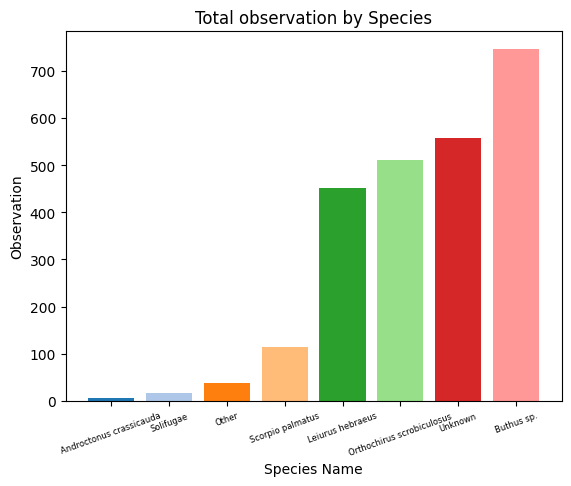

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
# Sample data for the bar plot
categories = []
values = []

# Create a colormap for the bars
colormap = matplotlib.colormaps['tab20']

for i in sorted(scorpion.groupby('Species_name')['Total_observers'].sum().items(), key=lambda x: x[1]):
  categories.append(i[0])
  values.append(i[1])

# Create a bar plot
plt.bar(categories, values,color=[colormap(i) for i in range(len(categories))])
# Add labels and title
plt.xlabel('Species Name')
plt.ylabel('Observation')
plt.title('Total observation by Species')
plt.xticks(fontsize = 6,rotation=20)
# Show the plot
plt.show()

###Total observation by season

In [ ]:
values

[7, 16, 39, 115, 451, 510, 557, 746]

In [ ]:
categories

['Androctonus crassicauda',
 'Solifugae',
 'Other',
 'Scorpio palmatus',
 'Leiurus hebraeus',
 'Orthochirus scrobiculosus',
 'Unknown',
 'Buthus sp.']

In [ ]:
sum(values)

2441

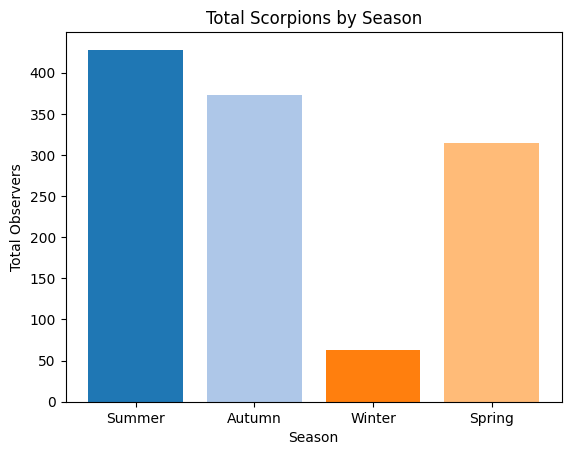

In [ ]:
import matplotlib.pyplot as plt

# Sample data for the bar plot
categories = []
values = []
colormap = matplotlib.colormaps['tab20']

for i in scorpion['Season'].value_counts().items():
  categories.append(i[0])
  values.append(i[ 1])
year = 2021
Autumn = scorpion[(scorpion['Season'] == 'Autumn') & (scorpion['Year'] == year)]['Total_observers']
Summer = scorpion[(scorpion['Season'] == 'Summer') & (scorpion['Year'] == year)]['Total_observers']
Spring = scorpion[(scorpion['Season'] == 'Spring') & (scorpion['Year'] == year)]['Total_observers']
Winter = scorpion[(scorpion['Season'] == 'Winter') & (scorpion['Year'] == year)]['Total_observers']

values[0] = sum(Summer)
values[1] = sum(Spring)
values[2] = sum(Autumn)
values[3] = sum(Winter)
# values[0] = sum(Summer)/values[0]
# values[1] = sum(Spring)/values[1]
# values[2] = sum(Autumn)/values[2]
# values[3] = sum(Winter)/values[3]

categories = ['Summer', 'Autumn', 'Winter', 'Spring']
values = [values[0], values[2], values[3], values[1]]
# Create a bar plot
plt.bar(categories, values, color=[colormap(i) for i in range(len(categories))])
# Add labels and title
plt.xlabel('Season')
plt.ylabel('Total Observers')
plt.title('Total Scorpions by Season')
# plt.xticks(rotation=90)
# Show the plot
plt.show()

### Statistic Test

In [ ]:
scorpion.head(2)

,Species_name,Age,Total_observers,Moon_status,Ground_Temperature,Habitat,x,y,Section,Date,Season,Month,Year,Hour,Area
0,Orthochirus scrobiculosus,Mature,2,Almost empty,NaN,Main,35.130741,30.144741,Center,2021-03-17 09:20:06,Spring,March,2021,9.5,Main_Center
1,Orthochirus scrobiculosus,Juvenile,2,Almost empty,NaN,Main,35.130741,30.144741,Center,2021-03-17 09:20:06,Spring,March,2021,9.5,Main_Center


In [ ]:
color_dict = {
    'reset': '\033[0m',
    'black': '\033[30m',
    'red': '\033[31m',
    'green': '\033[32m',
    'yellow': '\033[33m',
    'blue': '\033[34m',
    'magenta': '\033[35m',
    'cyan': '\033[36m',
    'white': '\033[37m',
    'bold': '\033[1m',
    'underline': '\033[4m'
}

In [ ]:
import numpy as np
from scipy.stats import ttest_ind, mannwhitneyu, permutation_test

# Assuming you have two datasets data1 and data2
year = 2021
Autumn = scorpion[(scorpion['Season'] == 'Autumn') & (scorpion['Year'] == year)]['Total_observers']
Summer = scorpion[(scorpion['Season'] == 'Summer') & (scorpion['Year'] == year)]['Total_observers']
Spring = scorpion[(scorpion['Season'] == 'Spring') & (scorpion['Year'] == year)]['Total_observers']
Winter = scorpion[(scorpion['Season'] == 'Winter') & (scorpion['Year'] == year)]['Total_observers']

def welch_t_statistic(x, y):
    mean_diff = np.mean(x) - np.mean(y)
    var_x = np.var(x, ddof=1)
    var_y = np.var(y, ddof=1)
    n_x = len(x)
    n_y = len(y)
    t_stat = mean_diff / np.sqrt(var_x / n_x + var_y / n_y)
    return t_stat

def mann_whitney_statistic(x, y):
    U, _ = mannwhitneyu(x, y, alternative="two-sided")
    return U

# Perform the desired statistic test
# You can comment/uncomment the appropriate lines below

#statistic_function = welch_t_statistic
#statistic_name = "Welch's t-test"

statistic_function = mann_whitney_statistic
statistic_name = "Mann-Whitney U test"

# Check if the p-value is less than the significance level (alpha)
alpha = 0.05
seasons = [('Autumn', Autumn), ('Summer', Summer), ('Spring', Spring), ('Winter', Winter)]
print(f"Statistic Test Between: \n")
for i in range(len(seasons)):
    for j in range(i+1, len(seasons)):
        p_value = permutation_test((seasons[i][1], seasons[j][1]), statistic_function).pvalue

        print(f"{seasons[i][0]} <-> {seasons[j][0]} using {statistic_name}")
        if p_value < alpha:
            print("Reject null hypothesis: The means are significantly different.")
        else:
            print("Fail to reject null hypothesis: The means are not significantly different.")
        print(f"With p-value: {p_value}")
        print()


Statistic Test Between: 

Autumn <-> Summer using Mann-Whitney U test
Reject null hypothesis: The means are significantly different.
With p-value: 0.005

Autumn <-> Spring using Mann-Whitney U test
Fail to reject null hypothesis: The means are not significantly different.
With p-value: 0.6612

Autumn <-> Winter using Mann-Whitney U test
Fail to reject null hypothesis: The means are not significantly different.
With p-value: 0.4628

Summer <-> Spring using Mann-Whitney U test
Reject null hypothesis: The means are significantly different.
With p-value: 0.0292

Summer <-> Winter using Mann-Whitney U test
Reject null hypothesis: The means are significantly different.
With p-value: 0.0274

Spring <-> Winter using Mann-Whitney U test
Fail to reject null hypothesis: The means are not significantly different.
With p-value: 0.346



### Total Observations By Month

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'scorpion' is your DataFrame

# Group by 'Month' and calculate the sum of 'Total_observers' for each month
grouped_data = scorpion[scorpion['Year'] == 2021].groupby('Month')[['Total_observers']].sum()

# Define a dictionary to map month names to numerical values
month_order = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}

# Convert month names to numerical values and sort the data
grouped_data['MonthNum'] = grouped_data.index.map(month_order)
grouped_data = grouped_data.sort_values('MonthNum')

# Create a colormap
colormap = plt.cm.viridis

# Plotting the bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(grouped_data.index, grouped_data['Total_observers'], color=colormap(grouped_data['Total_observers'] / max(grouped_data['Total_observers'])))

# Add colorbar
sm = plt.cm.ScalarMappable(cmap=colormap, norm=plt.Normalize(vmin=min(grouped_data['Total_observers']), vmax=max(grouped_data['Total_observers'])))
sm._A = []  # Fake up the array of the scalar mappable
cbar = plt.colorbar(sm, orientation='vertical')

plt.xlabel('Month')
plt.ylabel('Total Observers')
plt.title('Total Observations By Month')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


### Total Observers by Section and Habitat

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'scorpion' is your DataFrame

# Group by 'Section' and 'Habitat' and calculate the sum of 'Total_observers'
grouped_data = scorpion.groupby(['Section', 'Habitat'])['Total_observers'].sum().reset_index()

# Create a colormap
colormap = plt.cm.viridis

# Normalize the data for colormap mapping
normalized_values = (grouped_data['Total_observers'] - grouped_data['Total_observers'].min()) / (grouped_data['Total_observers'].max() - grouped_data['Total_observers'].min())

# Plotting the grouped bar plot
plt.figure(figsize=(10, 6))

sections = grouped_data['Section'].unique()
num_sections = len(sections)
bar_width = 0.2
x_positions = np.arange(len(grouped_data['Habitat'].unique()))

bars = []

for i, section in enumerate(sections):
    section_group = grouped_data[grouped_data['Section'] == section]
    bars.append(plt.bar(x_positions + i * bar_width, section_group['Total_observers'], bar_width, label=section, color=colormap(normalized_values[section_group.index])))

# ... (previous code)

# Adding annotations to the bars
for group_bars in bars:
    for bar in group_bars:
        height = bar.get_height()
        plt.annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=9)

# Adding section labels inside the bars
for i, section in enumerate(sections):
    section_group = grouped_data[grouped_data['Section'] == section]
    for j, bar in enumerate(bars[i]):
        section_label = section
        height = section_group['Total_observers'].iloc[j]
        plt.annotate(section_label, xy=(bar.get_x() + bar.get_width() / 2, height / 2), xytext=(0, 0), textcoords="offset points", ha='center', va='center', fontsize=9, color='white')

# ... (rest of the code)

# # Adding annotations to the bars
# for group_bars in bars:
#     for bar in group_bars:
#         height = bar.get_height()
#         plt.annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=9)

# Add colorbar
sm = plt.cm.ScalarMappable(cmap=colormap, norm=plt.Normalize(vmin=min(normalized_values), vmax=max(normalized_values)))
sm._A = []  # Fake up the array of the scalar mappable
cbar = plt.colorbar(sm, orientation='vertical')

plt.title('Total Observers by Section and Habitat')
plt.xlabel('Habitat')
plt.ylabel('Total Observers')
plt.xticks(x_positions + (num_sections - 1) * bar_width / 2, grouped_data['Habitat'].unique())
plt.gca().set_xticklabels([''] * len(grouped_data['Habitat'].unique()))  # Hide habitat labels on X-axis

# Adding section labels on the X-axis
plt.xticks(np.arange(len(grouped_data['Habitat'].unique())) + (num_sections - 1) * bar_width / 2, grouped_data['Habitat'].unique(), rotation=45)

plt.show()


### Mean Total Observers by Hour

In [ ]:
# Filter data for hours between 14:00 and 23:59
# filtered_data = scorpion
filtered_data = scorpion[(scorpion['Hour'] >= 14) & (scorpion['Hour'] <= 25)]
filtered_data = filtered_data[~((filtered_data['Hour']==17) & (filtered_data['Season']=='Spring'))]
filtered_data = filtered_data[~((filtered_data['Hour']==23.5) & (filtered_data['Season']=='Autumn'))]
filtered_data = filtered_data[~((filtered_data['Hour']==16.5) & (filtered_data['Season']=='Autumn'))]


# Group the filtered data by Hour and Season, and calculate the mean Total_observers
grouped_data = filtered_data.groupby(['Hour', 'Season'])['Total_observers'].mean().reset_index()

# Plotting a scatter plot with polynomial curve for different seasons
plt.figure(figsize=(10, 6))
for season in grouped_data['Season'].unique():
    subset = grouped_data[grouped_data['Season'] == season]
    plt.scatter(subset['Hour'], subset['Total_observers'], label=season)

    # Calculate the polynomial coefficients
    coeffs = np.polyfit(subset['Hour'], subset['Total_observers'], 2)
    polynomial_curve = np.polyval(coeffs, subset['Hour'])

    plt.plot(subset['Hour'], polynomial_curve, linestyle='dashed')

plt.title('Mean Total Observers by Hour (Colored by Season) with Polynomial Curves')
plt.xlabel('Hour')
plt.ylabel('Mean Total Observers')
plt.legend()
plt.grid(True)
plt.show()

### try to map

In [ ]:
cords_for_plot = {'Main_Center': (30.144633, 35.127449),
                  'Secondary_East': (30.142165, 35.145988),
                  'Main_East': (30.140495, 35.144872),
                  'Open_East': (30.143371, 35.136697),
                  'Main_West': (30.141362, 35.118193),
                  'Open_West': (30.140601, 35.117463),
                  'Open_Center': (30.146168, 35.126926),
                  'Secondary_Center': (30.146112, 35.128900),
                  'Secondary_West': (30.139692, 35.119330),
                  }

In [ ]:
scorpion.head()

In [ ]:
def get_x(Area):
  return cords_for_plot[Area][0]
def get_y(Area):
  return cords_for_plot[Area][1]

In [ ]:
scor_to_plot = scorpion.groupby('Area')['Total_observers'].agg(['sum','mean']).reset_index()
scor_to_plot['x'] = scor_to_plot['Area'].apply(get_x)
scor_to_plot['y'] = scor_to_plot['Area'].apply(get_y)
scor_to_plot['mean'] = round(scor_to_plot['mean'],2)
column_name_mapping = {
    'sum': 'Total_observers',
    'mean': 'Mean_observers',
}
scor_to_plot.rename(columns=column_name_mapping, inplace=True)

In [ ]:
scor_to_plot

### temp

In [ ]:
scorpion.head(2)

,Species_name,Age,Total_observers,Moon_status,Ground_Temperature,Habitat,x,y,Section,Date,Season,Month,Year,Hour,Area
0,Orthochirus scrobiculosus,Mature,2,Almost empty,NaN,Main,35.130741,30.144741,Center,2021-03-17 09:20:06,Spring,March,2021,9.5,Main_Center
1,Orthochirus scrobiculosus,Juvenile,2,Almost empty,NaN,Main,35.130741,30.144741,Center,2021-03-17 09:20:06,Spring,March,2021,9.5,Main_Center


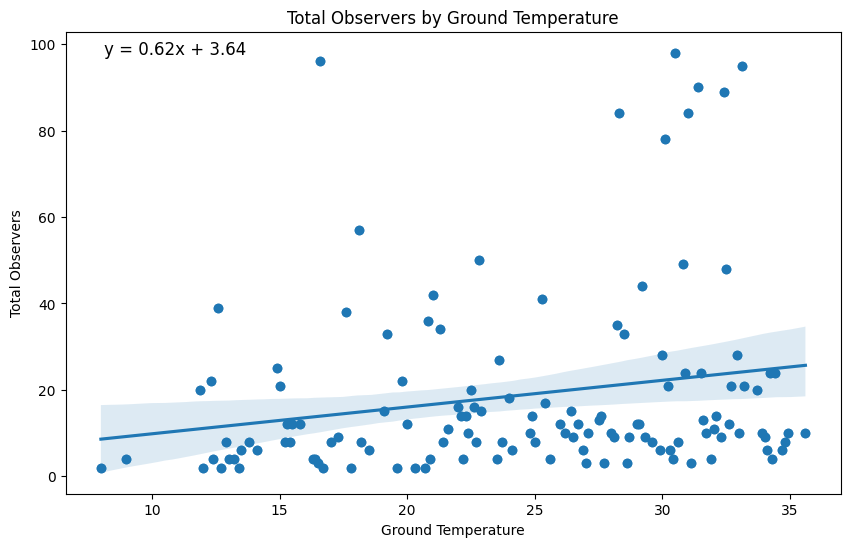

In [ ]:
from scipy.stats import linregress
import seaborn as sns
scorpion_temp = scorpion.dropna(subset=['Ground_Temperature'])
scorpion_temp = scorpion_temp[scorpion_temp['Ground_Temperature'] < 40]
# Scatter plot
# Group by 'Ground_Temperature' and calculate the sum of 'Total_observers'
grouped = scorpion_temp.groupby('Ground_Temperature')['Total_observers'].sum().reset_index()

# Bar plot
plt.figure(figsize=(10, 6))
plt.scatter(grouped['Ground_Temperature'], grouped['Total_observers'])
# # Perform linear regression
# slope, intercept, r_value, p_value, std_err = linregress(grouped['Ground_Temperature'], grouped['Total_observers'])
# regression_line = slope * grouped['Ground_Temperature'] + intercept

# # Plot the regression line
# plt.plot(grouped['Ground_Temperature'], regression_line, color='red', label='Regression Line')
sns.regplot(x=grouped['Ground_Temperature'], y=grouped['Total_observers'], ci=95)
# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(grouped['Ground_Temperature'], grouped['Total_observers'])

# Add the equation of the regression line to the plot
equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(equation, xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12)
plt.title('Total Observers by Ground Temperature')
plt.xlabel('Ground Temperature')
plt.ylabel('Total Observers')
plt.show()

### temp and habitate

<Figure size 1000x600 with 0 Axes>

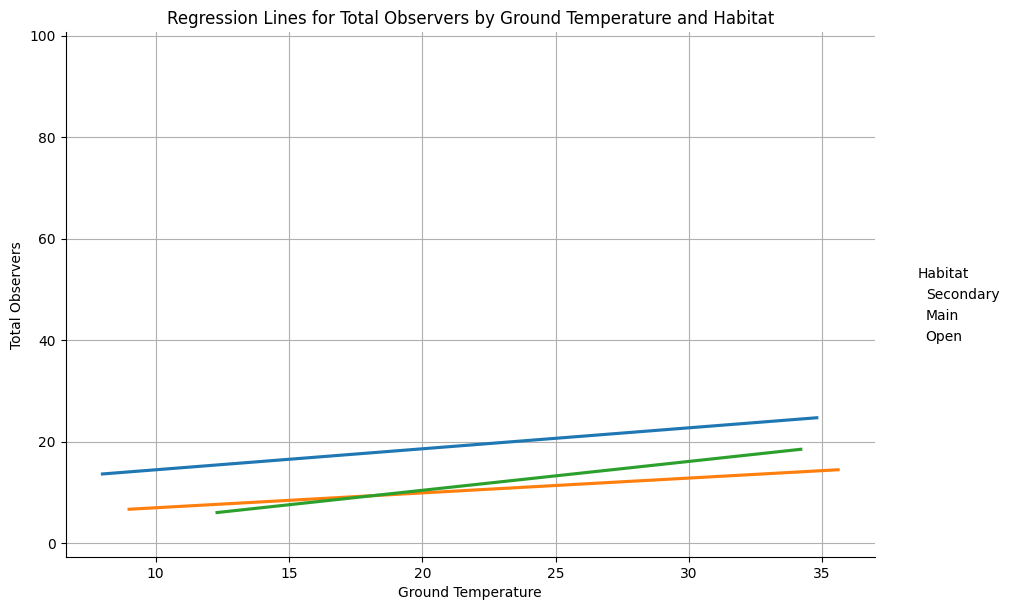

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data into the DataFrame
# df = pd.read_csv('your_data.csv')

# Drop rows with null values in 'Ground_Temperature', 'Total_observers', and 'Habitat'
scorpion_t_h = scorpion.dropna(subset=['Ground_Temperature', 'Total_observers', 'Habitat'])
scorpion_t_h = scorpion_t_h.groupby(['Ground_Temperature','Habitat'])['Total_observers'].sum().reset_index()
# Apply filter for 'Ground_Temperature' < 40
filtered_df = scorpion_t_h[scorpion_t_h['Ground_Temperature'] < 40]

# Create scatter plot with separate regression lines for each 'Habitat' category
plt.figure(figsize=(10, 6))
sns.lmplot(x='Ground_Temperature', y='Total_observers', data=filtered_df, ci=None, hue='Habitat', height=6, aspect=1.5, markers="")

plt.title('Regression Lines for Total Observers by Ground Temperature and Habitat')
plt.xlabel('Ground Temperature')
plt.ylabel('Total Observers')

plt.grid(True)
plt.show()



# Butterflies

## Data

In [ ]:
from datetime import time, timedelta
def calculate_average_time(row):
    time1, time2 = row['endTime'], row['startTime']
    # Convert times to seconds
    time1_seconds = time1.hour * 3600 + time1.minute * 60 + time1.second
    time2_seconds = time2.hour * 3600 + time2.minute * 60 + time2.second

    # Calculate the average in seconds
    average_seconds = (time1_seconds + time2_seconds) / 2

    # Convert average back to datetime.time
    average_hours = int(average_seconds // 3600)
    average_minutes = int((average_seconds % 3600) // 60)
    average_seconds = int(average_seconds % 60)
    average_time = time(average_hours, average_minutes, average_seconds)

    return average_time

In [ ]:
# butterflies_obs_path = "/content/drive/MyDrive/University/Year 4/Semester H/The Art of Analyzing Big Data/Project/פרפרים מאז 2021/obs.xlsx"
butterflies_obs_path = "/content/drive/MyDrive/obs.xlsx"

butterflies_obs = pd.read_excel(butterflies_obs_path)
butterflies_obs['Time'] = butterflies_obs.apply(calculate_average_time ,axis=1)

columns_to_remove = ['approvedBy', 'validGeo', 'validDmap', 'approve','transectCode','transectId','intRepDate', 'sourceOfData', 'fullName', 'repId', 'engSiteName','startTime','endTime','OldButtName']
butterflies_obs.drop(columns=columns_to_remove, inplace=True)
column_name_mapping = {
    'Lat': 'y',
    'Lon': 'x',
}
butterflies_obs.rename(columns=column_name_mapping, inplace=True)

In [ ]:
butterflies_obs['Date'] = pd.to_datetime(butterflies_obs['repDate'])
butterflies_obs['Season'] = butterflies_obs['Date'].apply(get_season)
butterflies_obs['Month'] = butterflies_obs['Date'].apply(get_month_name)
butterflies_obs['Year'] = butterflies_obs['Date'].apply(get_year)
butterflies_obs['Hour'] = butterflies_obs['Time'].apply(get_hour)

In [ ]:
butterflies_obs.head(2)

,repDate,siteName,ButtID,hSpeciesName,eSpeciesName,grpFamilyId,sectionNum,butterflyNum,butObsId,temperature,y,x,Time,Date,Season,Month,Year,Hour
0,2021-11-18,Shita center secondary,100.0,כַּחְלוֹן הַשִּׁטָּה,Azanus ubaldus,6.0,6,2.0,109246.0,23.25,30.144749,35.129579,12:22:00,2021-11-18,Autumn,November,2021,12.5
1,2021-11-18,Shita center secondary,100.0,כַּחְלוֹן הַשִּׁטָּה,Azanus ubaldus,6.0,3,1.0,109247.0,23.25,30.144749,35.129579,12:22:00,2021-11-18,Autumn,November,2021,12.5


In [ ]:
# butterflies_Dictionary_path = "/content/drive/MyDrive/University/Year 4/Semester H/The Art of Analyzing Big Data/Project/פרפרים מאז 2021/NewDictionary.xlsx"
butterflies_Dictionary_path = "/content/drive/MyDrive/NewDictionary.xlsx"

butterflies_Dictionary = pd.read_excel(butterflies_Dictionary_path)

In [ ]:
butterflies = pd.merge(butterflies_obs, butterflies_Dictionary, left_on='ButtID', right_on='ButtID')

In [ ]:
def get_habitat(siteName):
  if 'main' in siteName: return 'Main'
  if 'open' in siteName: return 'Open'
  if 'secondary' in siteName: return 'Secondary'

def get_section(siteName):
  if 'east' in siteName: return 'East'
  if 'west' in siteName: return 'West'
  if 'center' in siteName: return 'Center'
butterflies['Habitate'] = butterflies['siteName'].apply(get_habitat)
butterflies['Section'] = butterflies['siteName'].apply(get_section)

In [ ]:
butterflies = butterflies[butterflies['Year']>=2021]

In [ ]:
butterflies.head()

,repDate,siteName,ButtID,hSpeciesName,eSpeciesName,grpFamilyId,sectionNum,butterflyNum,butObsId,temperature,...,Month,Year,Hour,eGenus,eSpecies,scientificName,scientificFamily,eFamily,Habitate,Section
0,2021-11-18,Shita center secondary,100.0,כַּחְלוֹן הַשִּׁטָּה,Azanus ubaldus,6.0,6,2.0,109246.0,23.25,...,November,2021,12.5,Azanus,ubaldus,Azanus ubaldus,Lycaenidae,Azanus,Secondary,Center
1,2021-11-18,Shita center secondary,100.0,כַּחְלוֹן הַשִּׁטָּה,Azanus ubaldus,6.0,3,1.0,109247.0,23.25,...,November,2021,12.5,Azanus,ubaldus,Azanus ubaldus,Lycaenidae,Azanus,Secondary,Center
2,2021-11-26,Shita west secondary,100.0,כַּחְלוֹן הַשִּׁטָּה,Azanus ubaldus,6.0,1,1.0,113280.0,18.77,...,November,2021,9.5,Azanus,ubaldus,Azanus ubaldus,Lycaenidae,Azanus,Secondary,West
3,2021-11-26,Shita west secondary,100.0,כַּחְלוֹן הַשִּׁטָּה,Azanus ubaldus,6.0,3,1.0,113281.0,18.77,...,November,2021,9.5,Azanus,ubaldus,Azanus ubaldus,Lycaenidae,Azanus,Secondary,West
4,2021-11-26,Shita west secondary,100.0,כַּחְלוֹן הַשִּׁטָּה,Azanus ubaldus,6.0,6,1.0,113282.0,18.77,...,November,2021,9.5,Azanus,ubaldus,Azanus ubaldus,Lycaenidae,Azanus,Secondary,West


## plots


### 'Total observation by Species'

In [ ]:
butterflies['butterflyNum'].sum()

1159.0

In [ ]:
but_to_fam = {v[0]:v[1] for k,v in butterflies[['eGenus', 'scientificFamily']].drop_duplicates().iterrows()}
# but_to_fam
# fam_to_num = {fam:i for i,fam in enumerate(set(but_to_fam.values()))}
# fam_to_num.pop('Unidentified')
# fam_to_num
fam_to_num = {'Satyridae': 0,
 'Lycaenidae': 1,
 'Nymphalidae': 2,
 'Danaidae': 3,
 'Pieridae': 4}

<ipython-input-100-78bfaf10667f>:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = matplotlib.cm.get_cmap('tab20', len(fam_to_num))


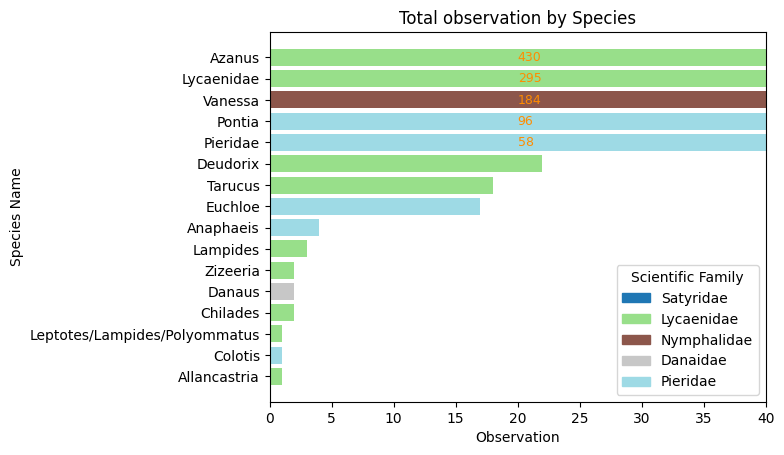

In [ ]:
import matplotlib.pyplot as plt
import matplotlib

# Sample data for the bar plot
categories = []
values = []
colors = []

# Create a colormap for the bars
colormap = matplotlib.cm.get_cmap('tab20', len(fam_to_num))

df = butterflies[butterflies['Year']>=2021].groupby('eGenus')['butterflyNum'].sum().items()
for i, (genus, total) in enumerate(sorted(df, key=lambda x: x[1])):
    if genus not in ['Unidentified', 'None Seen']:
        if but_to_fam[genus] in fam_to_num.keys():
          categories.append(genus)
          values.append(total)
          colors.append(colormap(fam_to_num[but_to_fam[genus]]))

# Create a bar plot
bars = plt.barh(categories, values, color=colors)

# Add labels and title
plt.ylabel('Species Name')
plt.xlabel('Observation')
plt.title('Total observation by Species')
plt.xlim((0, 40))

# Annotate bars with values if they are close to the xlim
for category, value in zip(categories, values):
    if value >= plt.xlim()[1] - 10:  # Adjust the threshold as needed
        plt.text(plt.xlim()[1] - 20 , categories.index(category), str(int(value)), va='center', color='darkorange', fontsize=9)

# Create a legend
legend = plt.legend(handles=[matplotlib.patches.Patch(color=colormap(fam_to_num[i]), label=i) for i in fam_to_num.keys()], title='Scientific Family', loc='lower right')
# legend = plt.legend(handles=[matplotlib.patches.Patch(color=colormap(fam_to_num[legend_labels[i]]), label=legend_labels[i]) for i in ], title='Scientific Family', loc='upper right')

# Show the plot
plt.show()


### Total observation by ScientificFamily

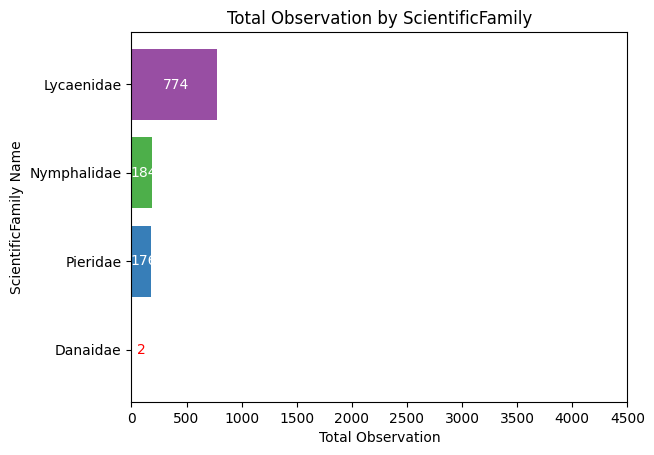

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

# Sample data for the bar plot
categories = []
values = []

for i in sorted(butterflies.groupby('scientificFamily')['butterflyNum'].sum().items(), key=lambda x: x[1]):
    if i[0] != 'Unidentified':
        categories.append(i[0])
        values.append(i[1])

# Create a colormap for the bars
colormap = matplotlib.colormaps['Set1']

# Create a bar plot with different colors for each category
bars = plt.barh(categories, values, color=[colormap(i) for i in range(len(categories))])

# Add labels and title
plt.xlabel('Total Observation')
plt.ylabel('ScientificFamily Name')
plt.title('Total Observation by ScientificFamily')
plt.xlim((0, 4500))

# Annotate each bar with its observation count and category
for bar, value in zip(bars, values):
    if value>10:
      plt.text((value-200)/2, bar.get_y() + bar.get_height() / 2, str(int(value)), va='center', color='white')
    else:
      plt.text(value+50, bar.get_y() + bar.get_height() / 2, str(int(value)), va='center', color='red')

# Show the plot
plt.show()


### Number of Butterflies in Each Habitat

In [ ]:
butterflies.head(3)

,repDate,siteName,ButtID,hSpeciesName,eSpeciesName,grpFamilyId,sectionNum,butterflyNum,butObsId,temperature,...,Month,Year,Hour,eGenus,eSpecies,scientificName,scientificFamily,eFamily,Habitate,Section
0,2021-11-18,Shita center secondary,100.0,כַּחְלוֹן הַשִּׁטָּה,Azanus ubaldus,6.0,6,2.0,109246.0,23.25,...,November,2021,12.5,Azanus,ubaldus,Azanus ubaldus,Lycaenidae,Azanus,Secondary,Center
1,2021-11-18,Shita center secondary,100.0,כַּחְלוֹן הַשִּׁטָּה,Azanus ubaldus,6.0,3,1.0,109247.0,23.25,...,November,2021,12.5,Azanus,ubaldus,Azanus ubaldus,Lycaenidae,Azanus,Secondary,Center
2,2021-11-26,Shita west secondary,100.0,כַּחְלוֹן הַשִּׁטָּה,Azanus ubaldus,6.0,1,1.0,113280.0,18.77,...,November,2021,9.5,Azanus,ubaldus,Azanus ubaldus,Lycaenidae,Azanus,Secondary,West


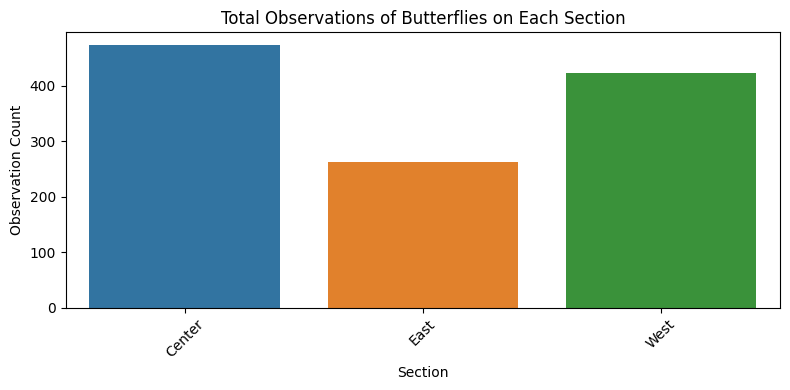

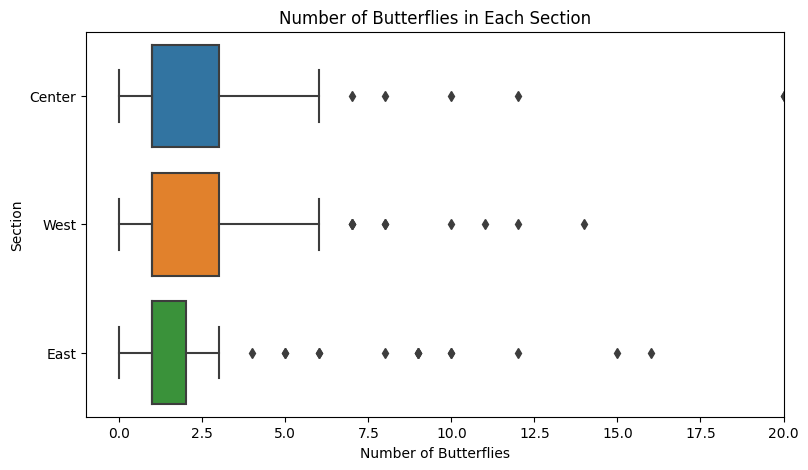

In [ ]:
import seaborn as sns
# Group the data by 'Habitate' and count the observations
observation_counts = butterflies.groupby('Section')['butterflyNum'].sum().reset_index()

# Create a bar plot using Seaborn with 'tab20' color palette
plt.figure(figsize=(8, 4))
sns.barplot(x=observation_counts.Section, y=observation_counts.butterflyNum, palette='tab10')
plt.title('Total Observations of Butterflies on Each Section')
plt.xlabel('Section')
plt.ylabel('Observation Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print()

plt.figure(figsize=(9, 5))
sns.boxplot(x='butterflyNum', y='Section', data=butterflies, orient='h', whis=1.5)  # Adjusted whis value
plt.xlabel('Number of Butterflies')
plt.ylabel('Section')
plt.title('Number of Butterflies in Each Section')
plt.xlim((-1,20))
plt.show()

### Total Observers by Section and Habitat

<ipython-input-104-b1746312ce9f>:57: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, orientation='vertical')
<ipython-input-104-b1746312ce9f>:63: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels([''] * len(grouped_data['Section'].unique()))  # Hide habitat labels on X-axis


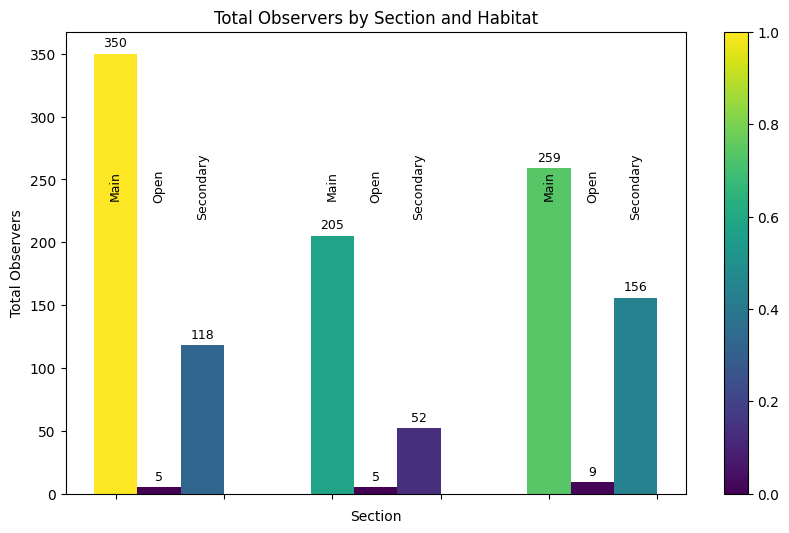

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'scorpion' is your DataFrame

# Group by 'Section' and 'Habitat' and calculate the sum of 'butterflyNum'
grouped_data = butterflies.groupby(['Section', 'Habitate'])['butterflyNum'].sum().reset_index()

# Create a colormap
colormap = plt.cm.viridis

# Normalize the data for colormap mapping
normalized_values = (grouped_data['butterflyNum'] - grouped_data['butterflyNum'].min()) / (grouped_data['butterflyNum'].max() - grouped_data['butterflyNum'].min())

# Plotting the grouped bar plot
plt.figure(figsize=(10, 6))

Habitates = grouped_data['Habitate'].unique()
num_Habitates = len(Habitates)
bar_width = 0.2
x_positions = np.arange(len(grouped_data['Section'].unique()))

bars = []

for i, Habitate in enumerate(Habitates):
    Habitate_group = grouped_data[grouped_data['Habitate'] == Habitate]
    bars.append(plt.bar(x_positions + i * bar_width, Habitate_group['butterflyNum'], bar_width, label=Habitate, color=colormap(normalized_values[Habitate_group.index])))

# ... (previous code)

# Adding annotations to the bars
for group_bars in bars:
    for bar in group_bars:
        height = bar.get_height()
        plt.annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=9)

# Adding section labels inside the bars
for i, Habitate in enumerate(Habitates):
    section_group = grouped_data[grouped_data['Habitate'] == Habitate]
    for j, bar in enumerate(bars[i]):
        Habitate_label = Habitate
        height = Habitate_group['butterflyNum'].iloc[j]
        plt.annotate(Habitate_label, xy=(bar.get_x() + bar.get_width() / 2, 245), xytext=(0, 0), textcoords="offset points", ha='center', va='center', fontsize=9, color='black', rotation=90)

# ... (rest of the code)

# # Adding annotations to the bars
# for group_bars in bars:
#     for bar in group_bars:
#         height = bar.get_height()
#         plt.annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=9)

# Add colorbar
sm = plt.cm.ScalarMappable(cmap=colormap, norm=plt.Normalize(vmin=min(normalized_values), vmax=max(normalized_values)))
sm._A = []  # Fake up the array of the scalar mappable
cbar = plt.colorbar(sm, orientation='vertical')

plt.title('Total Observers by Section and Habitat')
plt.xlabel('Section')
plt.ylabel('Total Observers')
# plt.xticks(x_positions + (num_sections - 1) * bar_width / 2, grouped_data['Section'].unique())
plt.gca().set_xticklabels([''] * len(grouped_data['Section'].unique()))  # Hide habitat labels on X-axis

# Adding section labels on the X-axis
# plt.xticks(np.arange(len(grouped_data['Section'].unique())) + (num_sections - 1) * bar_width / 2, grouped_data['Section'].unique(), rotation=45)
plt.show()


### Total Observations By Month

<ipython-input-105-f6b6ae77e791>:40: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, orientation='vertical')


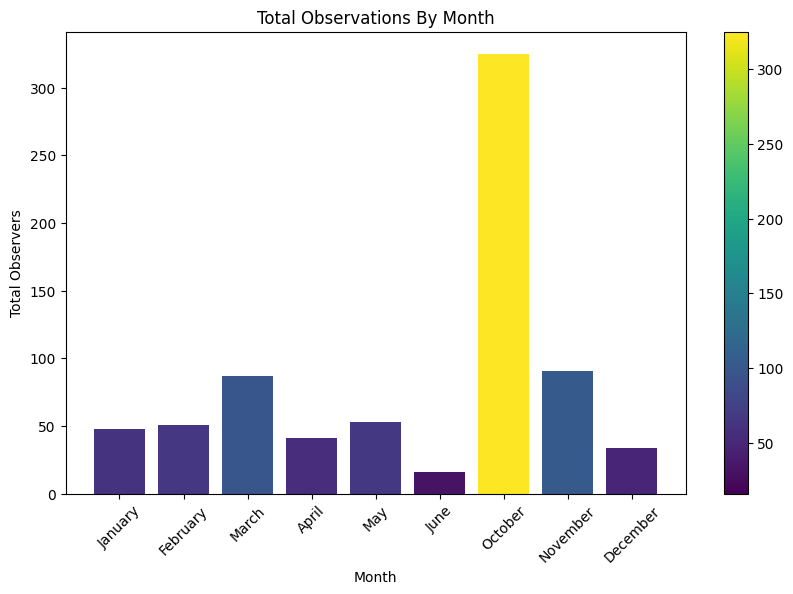

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'scorpion' is your DataFrame

# Group by 'Month' and calculate the sum of 'Total_observers' for each month
grouped_data = butterflies[butterflies['Year'] == 2022].groupby('Month')[['butterflyNum']].sum()

# Define a dictionary to map month names to numerical values
month_order = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}

# Convert month names to numerical values and sort the data
grouped_data['MonthNum'] = grouped_data.index.map(month_order)
grouped_data = grouped_data.sort_values('MonthNum')

# Create a colormap
colormap = plt.cm.viridis

# Plotting the bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(grouped_data.index, grouped_data['butterflyNum'], color=colormap(grouped_data['butterflyNum'] / max(grouped_data['butterflyNum'])))

# Add colorbar
sm = plt.cm.ScalarMappable(cmap=colormap, norm=plt.Normalize(vmin=min(grouped_data['butterflyNum']), vmax=max(grouped_data['butterflyNum'])))
sm._A = []  # Fake up the array of the scalar mappable
cbar = plt.colorbar(sm, orientation='vertical')

plt.xlabel('Month')
plt.ylabel('Total Observers')
plt.title('Total Observations By Month')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


### Mean Total Observers by Hour

In [ ]:
butterflies.head(3)

,repDate,siteName,ButtID,hSpeciesName,eSpeciesName,grpFamilyId,sectionNum,butterflyNum,butObsId,temperature,...,Month,Year,Hour,eGenus,eSpecies,scientificName,scientificFamily,eFamily,Habitate,Section
0,2021-11-18,Shita center secondary,100.0,כַּחְלוֹן הַשִּׁטָּה,Azanus ubaldus,6.0,6,2.0,109246.0,23.25,...,November,2021,12.5,Azanus,ubaldus,Azanus ubaldus,Lycaenidae,Azanus,Secondary,Center
1,2021-11-18,Shita center secondary,100.0,כַּחְלוֹן הַשִּׁטָּה,Azanus ubaldus,6.0,3,1.0,109247.0,23.25,...,November,2021,12.5,Azanus,ubaldus,Azanus ubaldus,Lycaenidae,Azanus,Secondary,Center
2,2021-11-26,Shita west secondary,100.0,כַּחְלוֹן הַשִּׁטָּה,Azanus ubaldus,6.0,1,1.0,113280.0,18.77,...,November,2021,9.5,Azanus,ubaldus,Azanus ubaldus,Lycaenidae,Azanus,Secondary,West


/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


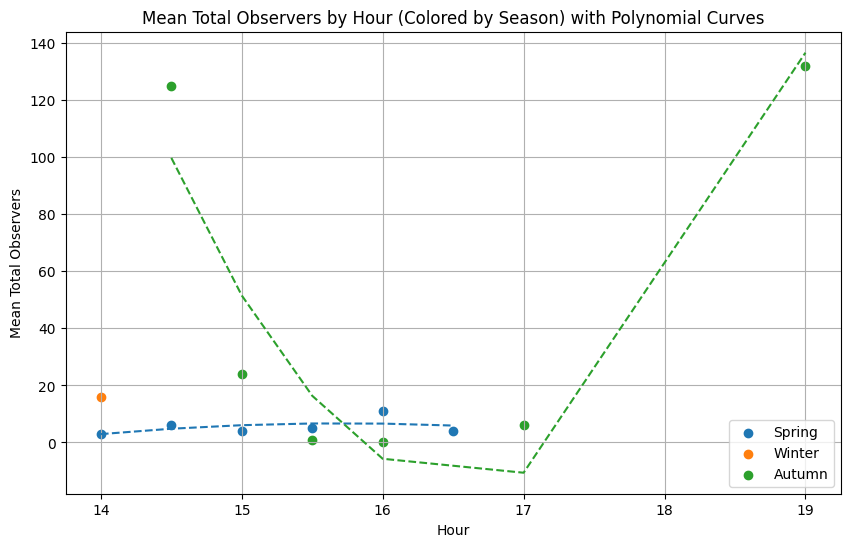

In [ ]:
# Filter data for hours between 14:00 and 23:59
# filtered_data = scorpion
filtered_data = butterflies[(butterflies['Hour'] >= 14) & (butterflies['Hour'] <= 25)]
filtered_data = filtered_data[~((filtered_data['Hour']==17) & (filtered_data['Season']=='Spring'))]
filtered_data = filtered_data[~((filtered_data['Hour']==23.5) & (filtered_data['Season']=='Autumn'))]
filtered_data = filtered_data[~((filtered_data['Hour']==16.5) & (filtered_data['Season']=='Autumn'))]


# Group the filtered data by Hour and Season, and calculate the mean Total_observers
grouped_data = filtered_data.groupby(['Hour', 'Season'])['butterflyNum'].sum().reset_index()

# Plotting a scatter plot with polynomial curve for different seasons
plt.figure(figsize=(10, 6))
for season in grouped_data['Season'].unique():
    subset = grouped_data[grouped_data['Season'] == season]
    plt.scatter(subset['Hour'], subset['butterflyNum'], label=season)

    # Calculate the polynomial coefficients
    coeffs = np.polyfit(subset['Hour'], subset['butterflyNum'], 2)
    polynomial_curve = np.polyval(coeffs, subset['Hour'])

    plt.plot(subset['Hour'], polynomial_curve, linestyle='dashed')

plt.title('Mean Total Observers by Hour (Colored by Season) with Polynomial Curves')
plt.xlabel('Hour')
plt.ylabel('Mean Total Observers')
plt.legend()
plt.grid(True)
plt.show()

### tmp

In [ ]:
butterflies.head(3)

,repDate,siteName,ButtID,hSpeciesName,eSpeciesName,grpFamilyId,sectionNum,butterflyNum,butObsId,temperature,...,Month,Year,Hour,eGenus,eSpecies,scientificName,scientificFamily,eFamily,Habitate,Section
0,2021-11-18,Shita center secondary,100.0,כַּחְלוֹן הַשִּׁטָּה,Azanus ubaldus,6.0,6,2.0,109246.0,23.25,...,November,2021,12.5,Azanus,ubaldus,Azanus ubaldus,Lycaenidae,Azanus,Secondary,Center
1,2021-11-18,Shita center secondary,100.0,כַּחְלוֹן הַשִּׁטָּה,Azanus ubaldus,6.0,3,1.0,109247.0,23.25,...,November,2021,12.5,Azanus,ubaldus,Azanus ubaldus,Lycaenidae,Azanus,Secondary,Center
2,2021-11-26,Shita west secondary,100.0,כַּחְלוֹן הַשִּׁטָּה,Azanus ubaldus,6.0,1,1.0,113280.0,18.77,...,November,2021,9.5,Azanus,ubaldus,Azanus ubaldus,Lycaenidae,Azanus,Secondary,West


In [ ]:
butterflies.columns

Index(['repDate', 'siteName', 'ButtID', 'hSpeciesName', 'eSpeciesName',
       'grpFamilyId', 'sectionNum', 'butterflyNum', 'butObsId', 'temperature',
       'y', 'x', 'Time', 'Date', 'Season', 'Month', 'Year', 'Hour', 'eGenus',
       'eSpecies', 'scientificName', 'scientificFamily', 'eFamily', 'Habitate',
       'Section'],
      dtype='object')

<ipython-input-89-7d7b1b9ecead>:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', num_seasons)


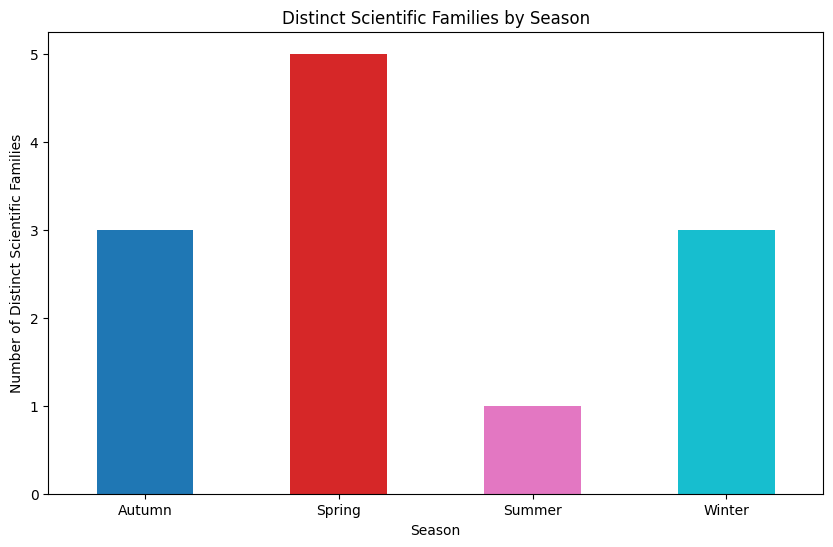

In [ ]:
# Select relevant columns
selected_cols = ['scientificFamily', 'Season']

# Drop rows with null values in 'scientificFamily' and 'Season'
butterflies_s = butterflies[butterflies['Year'] == 2022].dropna(subset=selected_cols)

# Group by 'Season' and count distinct 'scientificFamily' values
grouped = butterflies_s.groupby('Season')['scientificFamily'].nunique()
# Get the number of distinct seasons
num_seasons = len(grouped)

# Create a list of unique colors using a colormap
colors = plt.cm.get_cmap('tab10', num_seasons)
color_list = [colors(i) for i in range(num_seasons)]

# Create a bar plot with unique colors for each bar
plt.figure(figsize=(10, 6))
grouped.plot(kind='bar', color=color_list)

plt.title('Distinct Scientific Families by Season')
plt.xlabel('Season')
plt.ylabel('Number of Distinct Scientific Families')
plt.xticks(rotation=0)  # To avoid rotation of x-axis labels
plt.show()
# # Create a bar plot
# plt.figure(figsize=(10, 6))
# grouped.plot(kind='bar', color='blue')

# plt.title('Distinct Scientific Families by Season')
# plt.xlabel('Season')
# plt.ylabel('Number of Distinct Scientific Families')
# plt.show()